Fits for number of data points:1000
Iteration 1, loss = 0.70198543
Iteration 2, loss = 0.56325014
Iteration 3, loss = 0.42685963
Iteration 4, loss = 0.28826064
Iteration 5, loss = 0.17592908
Iteration 6, loss = 0.10135931
Iteration 7, loss = 0.05715344
Iteration 8, loss = 0.03311584
Iteration 9, loss = 0.02070434
Iteration 10, loss = 0.01342880
Iteration 11, loss = 0.00937185
Iteration 12, loss = 0.00698785
Iteration 13, loss = 0.00538285
Iteration 14, loss = 0.00421897
Iteration 15, loss = 0.00347550
Iteration 16, loss = 0.00288448
Iteration 17, loss = 0.00243363
Iteration 18, loss = 0.00207859
Iteration 19, loss = 0.00180088
Iteration 20, loss = 0.00156697
Iteration 21, loss = 0.00138971
Iteration 22, loss = 0.00123901
Iteration 23, loss = 0.00111017
Iteration 24, loss = 0.00100309
Iteration 25, loss = 0.00091104
Iteration 26, loss = 0.00083409
Iteration 27, loss = 0.00076940
Iteration 28, loss = 0.00070864
Iteration 29, loss = 0.00066025
Iteration 30, loss = 0.00061410
Iteration 31,

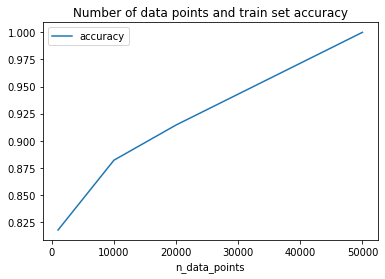

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from utils import results, get_reviews
import pandas as pd

def make_baseline_sklearn():
    return Pipeline([
        ('d2v', CountVectorizer(
            max_features=10000,
            max_df=0.95, min_df=0.01)),
        #('classifier', LogisticRegression(
        #    solver='saga', max_iter=5000)
        #)
        ('classifier', MLPClassifier(
            batch_size=100, hidden_layer_sizes=(64, 64),
            solver='adam', verbose=True, max_iter=400,
            n_iter_no_change=20
        ))
    ])


df = get_reviews()
#df = df.sample(1000)
        
(
    pd.DataFrame(results(
        df,
        make_model=make_baseline_sklearn,
        n_data_points=[1000, 10000, 20000, len(df)],
        #n_data_points=[100, 500, len(df)],
        batch_size_inference=10000
    ))
    .set_index('n_data_points')
    .plot(title='Number of data points and train set accuracy')
);